# 0. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 1. Load and Visualize Data

## 1. Load Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## 1.2 Visualize Data

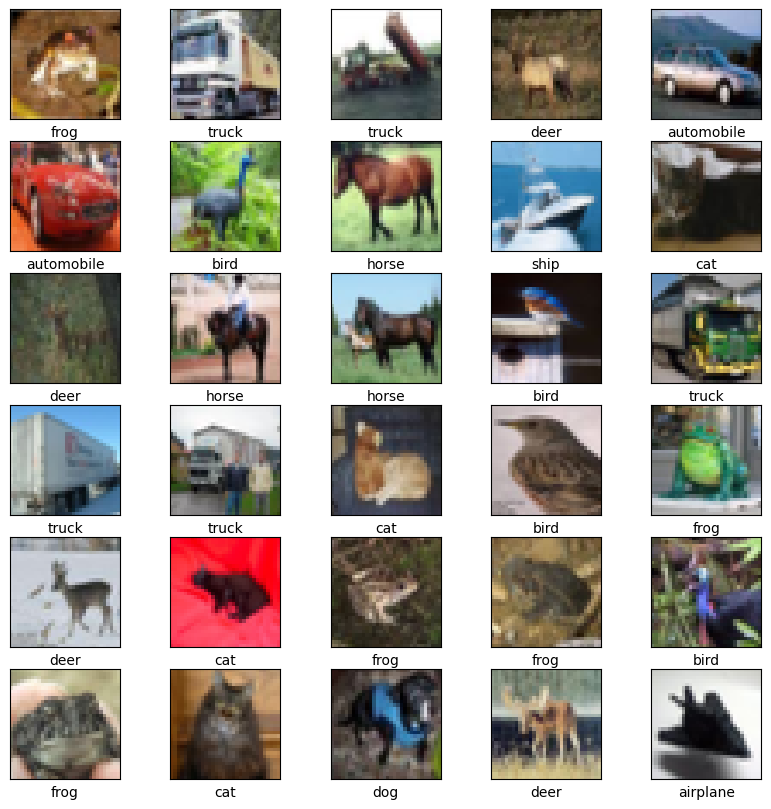

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

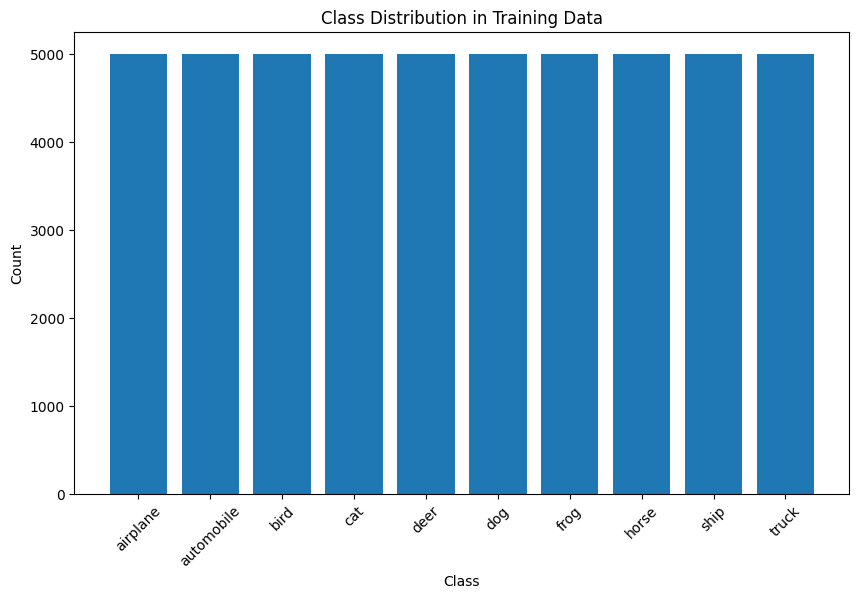

In [5]:
# Count the occurrences of each class in train data
class_counts = np.bincount(train_labels.flatten())

df_train_class = pd.DataFrame({'Class': class_names, 'Count': class_counts})

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_train_class['Class'], df_train_class['Count'])
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

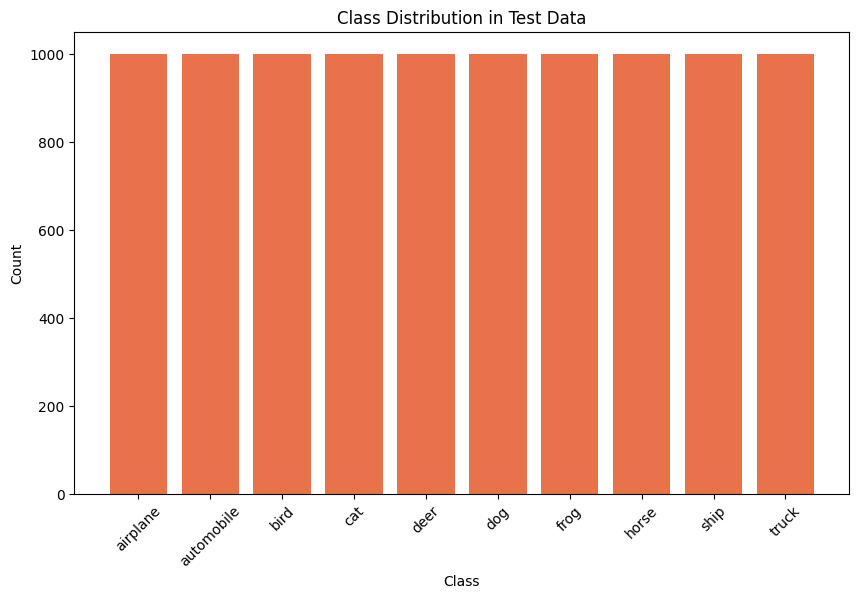

In [6]:
test_class_counts = np.bincount(test_labels.flatten())

df_test_class = pd.DataFrame({'Class': class_names, 'Count': test_class_counts})

plt.figure(figsize=(10, 6))
plt.bar(df_test_class['Class'], df_test_class['Count'], color='#e9724d')
plt.title('Class Distribution in Test Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [7]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

f1score = keras.metrics.F1Score(average='weighted')

In [8]:
def show_epoch(history):
    metrics_list = ['loss', 'accuracy']
    num_metrics = len(metrics_list)
    num_cols = 2
    num_rows = (num_metrics + 1) // num_cols

    plt.figure(figsize=(15, num_rows * 5))

    for i, metric in enumerate(metrics_list):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.plot(history.history[metric], label=f'Training {metric}')
        plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
        plt.title(f'{metric.capitalize()} Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()

In [9]:
def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

    # Set tick labels
    ax.xaxis.set_ticklabels(class_names, rotation=90, ha="right", fontsize=10)
    ax.yaxis.set_ticklabels(class_names, rotation=0, fontsize=10)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def display_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    metrics = { 'Model': model_name,
               'Accuracy': accuracy,
               'F1 score': f1,
               'Precision': precision,
               'Recall': recall}

    return metrics

# 2. Split the Data and Rescaling

## 2.1 Split Data

In [10]:
validation_images, test_images, validation_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.6, random_state=42)

print(f"Train Images: {train_images.shape}")
print(f"Train Labels: {train_labels.shape}")

print(f"Validation Images: {validation_images.shape}")
print(f"Validation Labels: {validation_labels.shape}")

print(f"Test Images: {test_images.shape}")
print(f"Test Labels: {test_labels.shape}")

Train Images: (50000, 32, 32, 3)
Train Labels: (50000, 1)
Validation Images: (4000, 32, 32, 3)
Validation Labels: (4000, 1)
Test Images: (6000, 32, 32, 3)
Test Labels: (6000, 1)


## 2.2 Rescaling the Data

In [11]:
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

# 3. Train Models

## 3.1 Simple CNN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3651 - loss: 1.7108 - val_accuracy: 0.5428 - val_loss: 1.2906
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5858 - loss: 1.1697 - val_accuracy: 0.6140 - val_loss: 1.0724
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6471 - loss: 1.0071 - val_accuracy: 0.6518 - val_loss: 0.9797
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6926 - loss: 0.8835 - val_accuracy: 0.6647 - val_loss: 0.9429
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7194 - loss: 0.8116 - val_accuracy: 0.6945 - val_loss: 0.8869
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7418 - loss: 0.7386 - val_accuracy: 0.6948 - val_loss: 0.8709
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7555 - loss: 0.6950 - val_accuracy: 0.6927 - val_loss: 0.8810
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7766 - loss: 0.6392 -

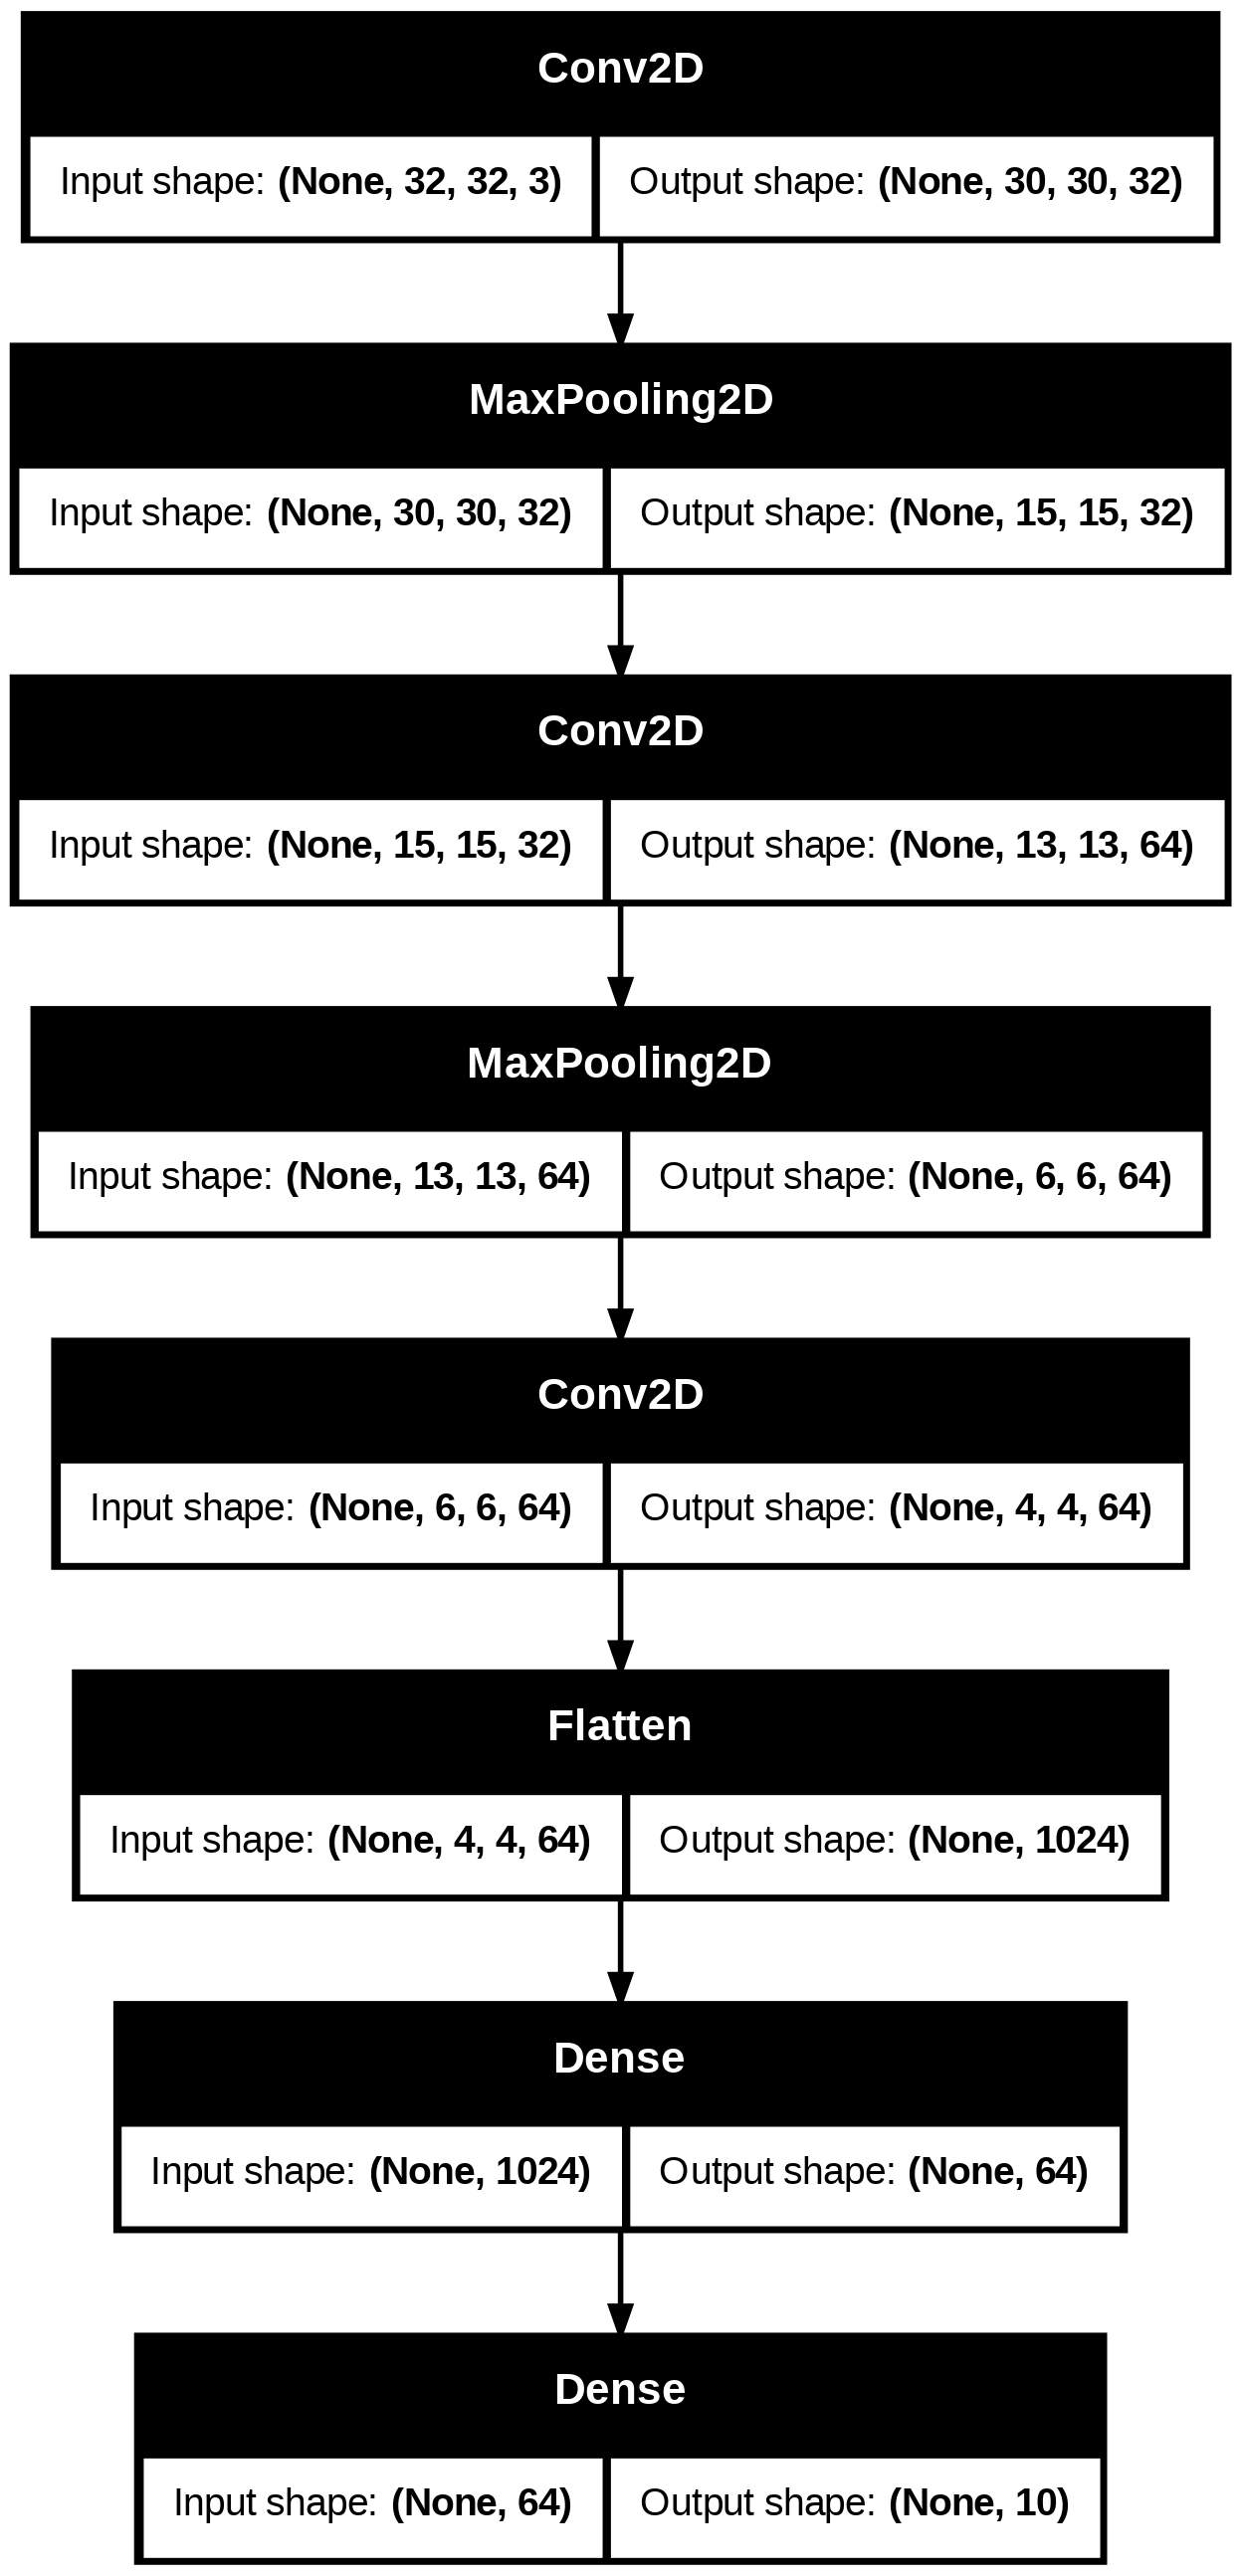

In [12]:
cnn_simple = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

cnn_simple.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

cnn_simple.summary()

cnn_simple_history = cnn_simple.fit(
    train_images, train_labels,
    epochs = 20,
    validation_data=(validation_images, validation_labels),
    callbacks=[early_stopping]
)
tf.keras.utils.plot_model(cnn_simple, show_shapes=True)

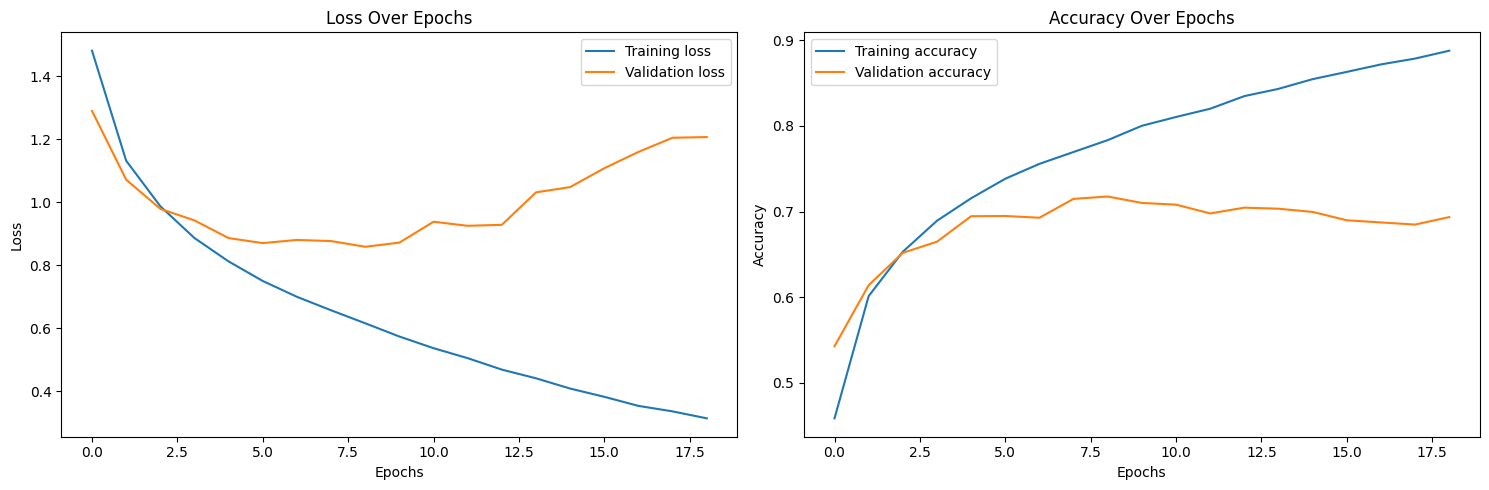

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


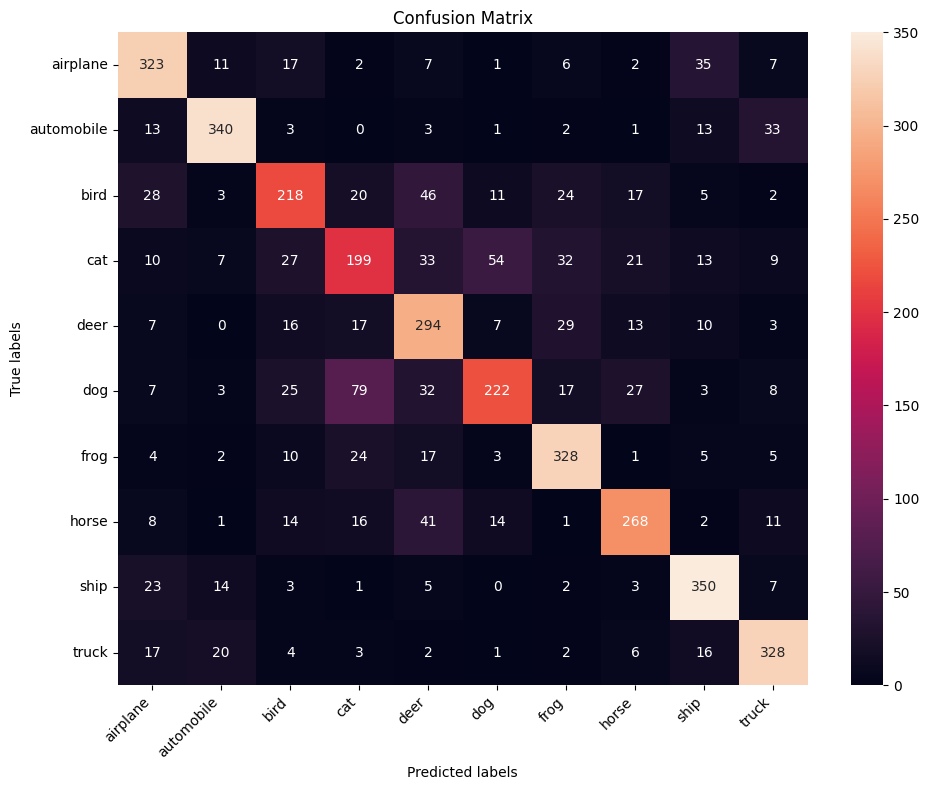

{'Model': 'Simple CNN', 'Accuracy': 0.7175, 'F1 score': 0.7138160107007134, 'Precision': 0.7160552888029615, 'Recall': 0.7175}


In [13]:
show_epoch(cnn_simple_history)

# Predict the classes for the validation set
y_pred_cnn_simple = cnn_simple.predict(validation_images)
y_pred_classes_cnn_simple = np.argmax(y_pred_cnn_simple, axis=1)
y_true_classes_cnn_simple = validation_labels.flatten()

cnn_simple_cm = display_confusion_matrix(y_true_classes_cnn_simple, y_pred_classes_cnn_simple)

cnn_simple_metrics = display_metrics(y_true_classes_cnn_simple, y_pred_classes_cnn_simple, "Simple CNN")
print(cnn_simple_metrics)

## 3.2 RestNet-18

In [14]:
@tf.keras.utils.register_keras_serializable()
class ResNetBlock(tf.keras.Model):
    def __init__(self, num_filters, filter_size=(3, 3), downsample=False, **kwargs):
        super(ResNetBlock, self).__init__(**kwargs)
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.downsample_flag = downsample

        # First convolutional layer with optional downsampling
        self.conv_layer1 = tf.keras.layers.Conv2D(num_filters, filter_size, padding='same')
        self.batch_norm1 = tf.keras.layers.BatchNormalization()

        # Second convolutional layer
        self.conv_layer2 = tf.keras.layers.Conv2D(num_filters, filter_size, padding='same')
        self.batch_norm2 = tf.keras.layers.BatchNormalization()

        self.residual_shortcut = lambda x: x
        if downsample:
            self.conv_layer1 = tf.keras.layers.Conv2D(num_filters, filter_size, padding='same', strides=(2, 2))
            self.residual_shortcut = tf.keras.Sequential([
                tf.keras.layers.Conv2D(num_filters, (1, 1), strides=(2, 2)),
                tf.keras.layers.BatchNormalization()
            ])

        # Activation and addition layers
        self.addition = tf.keras.layers.Add()
        self.activation = tf.keras.layers.ReLU()

    def call(self, inputs):
        x = self.conv_layer1(inputs)
        x = self.batch_norm1(x)
        x = self.activation(x)

        # Second convolutional pass
        x = self.conv_layer2(x)
        x = self.batch_norm2(x)

        shortcut = self.residual_shortcut(inputs)
        x = self.addition([x, shortcut])
        x = self.activation(x)

        return x

    def get_config(self):
        # Saving the configuration for serialization
        base_config = super(ResNetBlock, self).get_config()
        base_config.update({
            'num_filters': self.num_filters,
            'filter_size': self.filter_size,
            'downsample': self.downsample_flag
        })
        return base_config


In [15]:
restnet18 = models.Sequential([
    layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
    ResNetBlock(64),
    ResNetBlock(64),
    ResNetBlock(128, downsample=True),
    ResNetBlock(128),
    ResNetBlock(256, downsample=True),
    ResNetBlock(256),
    ResNetBlock(512, downsample=True),
    ResNetBlock(512),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10)
])

restnet18.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

restnet18.summary()

restnet18_history = restnet18.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(validation_images, validation_labels),
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_net_block (ResNetBlock)          │ (None, 8, 8, 64)            │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_net_block_1 (ResNetBlock)        │ (None, 8, 8, 64)            │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_net_block_2 (ResNetBlock)        │ (None, 4, 4, 128)           │         231,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_net_block_3 (ResNetBlock)        │ (None, 4, 4, 128)           │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_net_block_4 (ResNetBlock)        │ (None, 2, 2, 256)           │         921,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_net_block_5 (ResNetBlock)        │ (None, 2, 2, 256)           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_net_block_6 (ResNetBlock)        │ (None, 1, 1, 512)           │       3,677,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_net_block_7 (ResNetBlock)        │ (None, 1, 1, 512)           │       4,723,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,196,042 (42.71 MB)

 Trainable params: 11,186,442 (42.67 MB)

 Non-trainable params: 9,600 (37.50 KB)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.3926 - loss: 1.7717 - val_accuracy: 0.5272 - val_loss: 1.3518
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6035 - loss: 1.1271 - val_accuracy: 0.5343 - val_loss: 1.4709
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6837 - loss: 0.9139 - val_accuracy: 0.6747 - val_loss: 0.9274
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7321 - loss: 0.7812 - val_accuracy: 0.6205 - val_loss: 1.1141
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7687 - loss: 0.6781 - val_accuracy: 0.6982 - val_loss: 0.8835
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8024 - loss: 0.5765 - val_accuracy: 0.7305 - val_loss: 0.8231
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8379 - loss: 0.4762 - val_accuracy: 0.7412 - val_loss: 0.7847
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8573 - loss: 

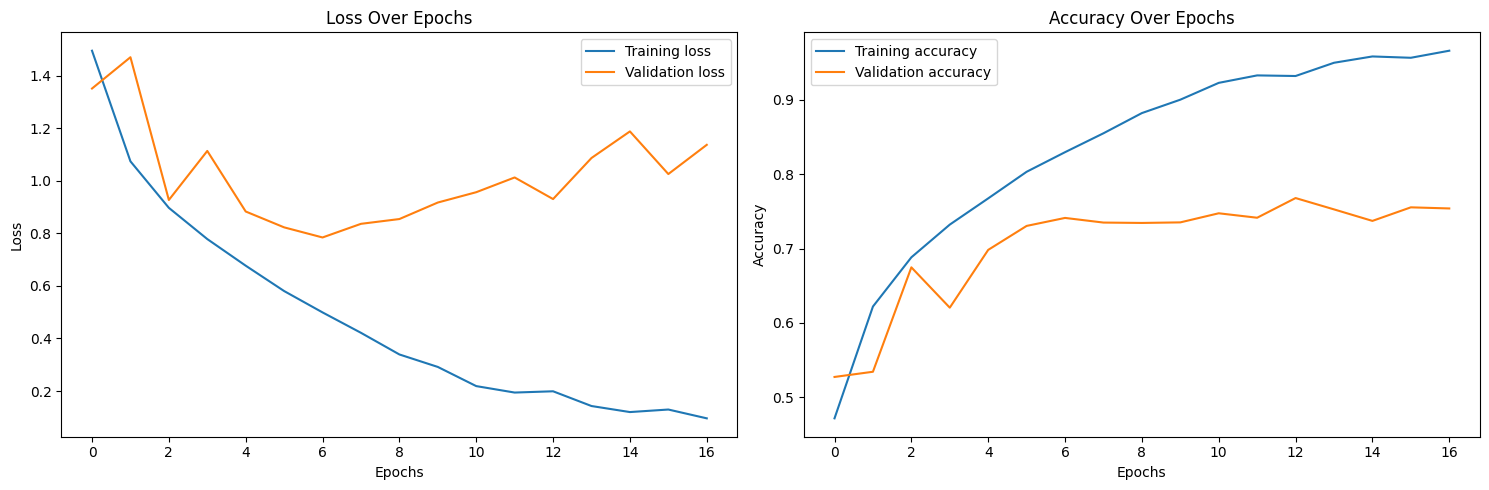

In [16]:
show_epoch(restnet18_history)

In [17]:
# Save the model
restnet18.save('model_restnet18.keras')

In [18]:
# Load the model
restnet18 = tf.keras.models.load_model('model_restnet18.keras', custom_objects={'ResNetBlock': ResNetBlock})

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


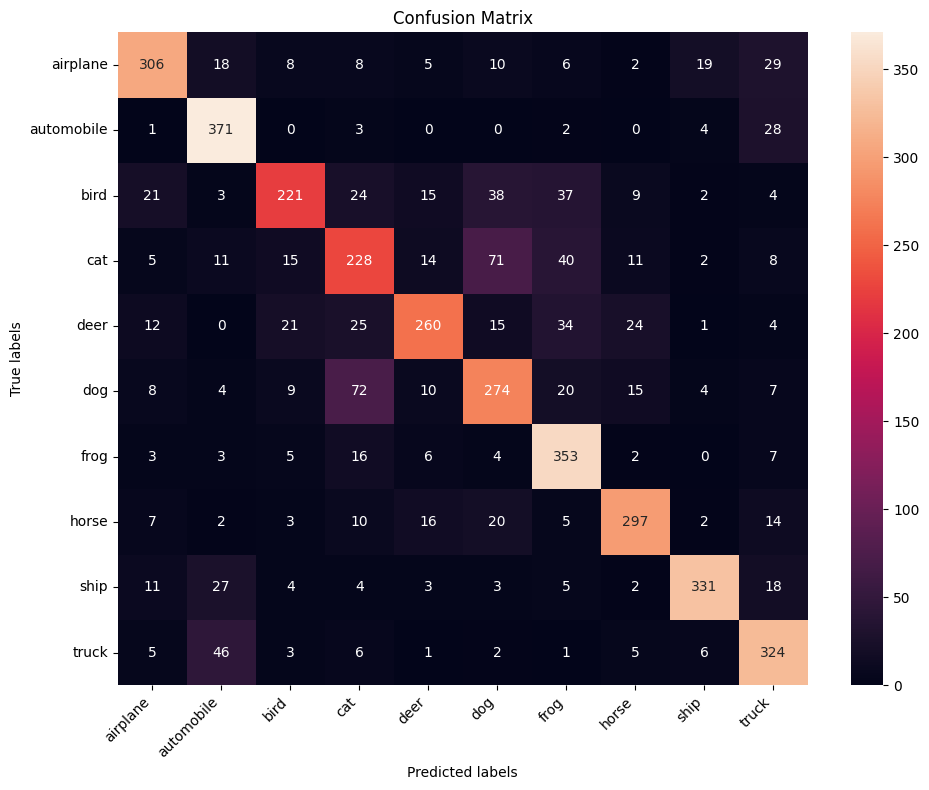

{'Model': 'ResNet-18', 'Accuracy': 0.74125, 'F1 score': 0.7394035124946456, 'Precision': 0.7453079013229437, 'Recall': 0.74125}


In [19]:
y_pred_resnet18 = restnet18.predict(validation_images)
y_pred_classes_resnet18 = np.argmax(y_pred_resnet18, axis=1)
y_true_classes_resnet18 = validation_labels.flatten()

resnet18_cm = display_confusion_matrix(y_true_classes_resnet18, y_pred_classes_resnet18)

resnet18_metrics = display_metrics(y_true_classes_resnet18, y_pred_classes_resnet18, "ResNet-18")
print(resnet18_metrics)

## 3.3 AlexNet

In [20]:
@tf.keras.utils.register_keras_serializable()
class AlexNetBlock(tf.keras.Model):
    def __init__(self, num_filters, filter_size=(3, 3), pool_size=(2, 2), **kwargs):
        super(AlexNetBlock, self).__init__(**kwargs)
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.pool_size = pool_size

        # Convolutional layer
        self.conv_layer = tf.keras.layers.Conv2D(num_filters, filter_size, padding='same')
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.activation = tf.keras.layers.ReLU()

        # Max pooling layer
        self.max_pool = tf.keras.layers.MaxPooling2D(pool_size)

    def call(self, inputs):
        x = self.conv_layer(inputs)
        x = self.batch_norm(x)
        x = self.activation(x)
        x = self.max_pool(x)

        return x

    def get_config(self):
        # Saving the configuration for serialization
        base_config = super(AlexNetBlock, self).get_config()
        base_config.update({
            'num_filters': self.num_filters,
            'filter_size': self.filter_size,
            'pool_size': self.pool_size
        })
        return base_config

In [26]:
alexnet = models.Sequential([
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

alexnet.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

alexnet.summary()

alexnet_history = alexnet.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(validation_images, validation_labels),
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 8, 8, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,573,578 (9.82 MB)

 Trainable params: 2,573,194 (9.82 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3491 - loss: 1.7665 - val_accuracy: 0.5253 - val_loss: 1.3781
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5766 - loss: 1.2033 - val_accuracy: 0.6190 - val_loss: 1.0976
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6428 - loss: 1.0365 - val_accuracy: 0.6122 - val_loss: 1.0932
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6789 - loss: 0.9344 - val_accuracy: 0.6750 - val_loss: 0.9342
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7060 - loss: 0.8656 - val_accuracy: 0.6415 - val_loss: 1.0549
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7273 - loss: 0.8075 - val_accuracy: 0.6665 - val_loss: 0.9923
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7497 - loss: 0.7496 - val_accuracy: 0.6085 - val_loss: 1.1747
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7625 - loss: 0.7123 -

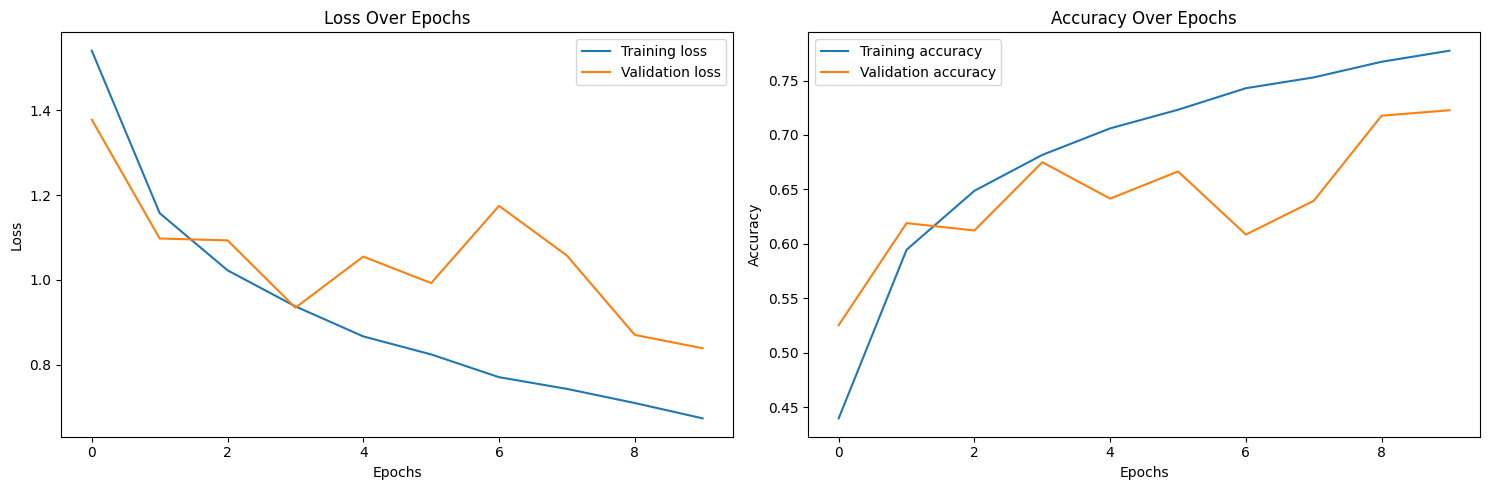

In [27]:
show_epoch(alexnet_history)

In [28]:
alexnet.save('model_alexnet.keras')

In [29]:
alexnet = tf.keras.models.load_model('model_alexnet.keras', custom_objects={'AlexNetBlock': AlexNetBlock})

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


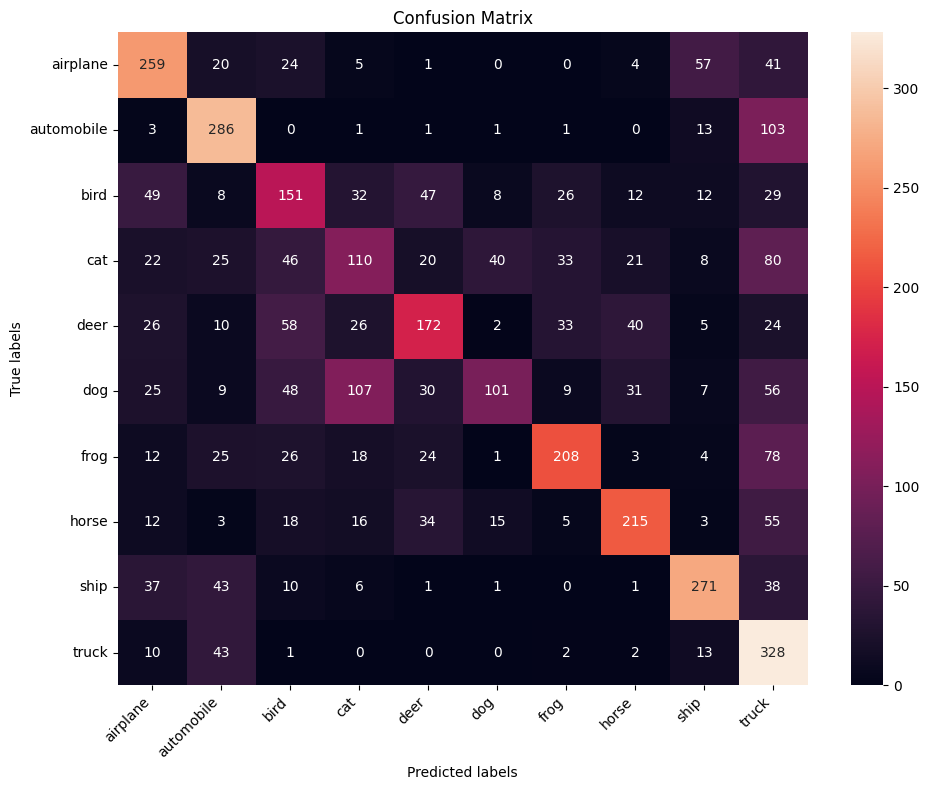

{'Model': 'AlexNet', 'Accuracy': 0.52525, 'F1 score': 0.5163364251688627, 'Precision': 0.5434404918659786, 'Recall': 0.52525}


In [30]:
y_pred_alexnet = alexnet.predict(validation_images)
y_pred_classes_alexnet = np.argmax(y_pred_alexnet, axis=1)
y_true_classes_alexnet = validation_labels.flatten()

alexnet_cm = display_confusion_matrix(y_true_classes_alexnet, y_pred_classes_alexnet)

alexnet_metrics = display_metrics(y_true_classes_alexnet, y_pred_classes_alexnet, "AlexNet")
print(alexnet_metrics)

# 4. Compare Models

        Model  Accuracy  F1 score  Precision   Recall
0  Simple CNN   0.71750  0.713816   0.716055  0.71750
1   ResNet-18   0.74125  0.739404   0.745308  0.74125
2     AlexNet   0.52525  0.516336   0.543440  0.52525


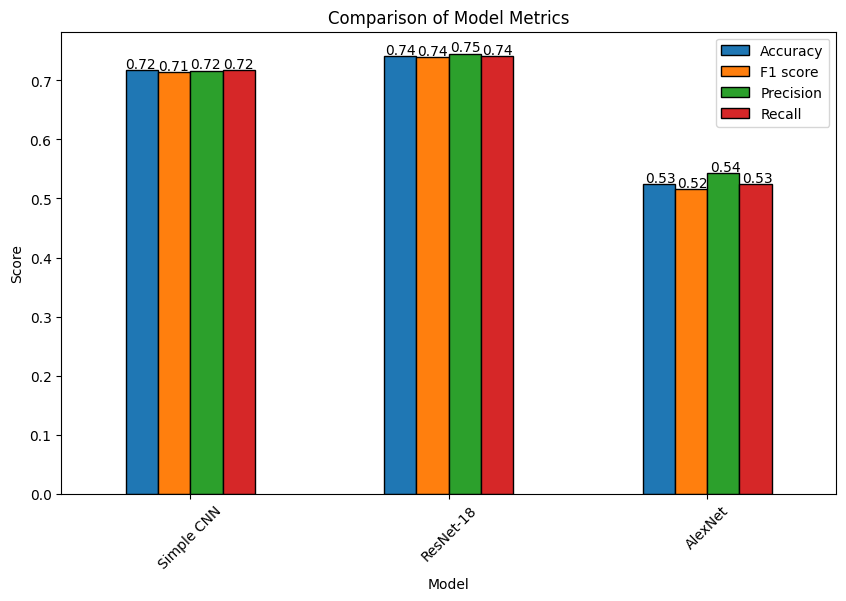

In [31]:
# Collect metrics from different models
metrics_list = [cnn_simple_metrics, resnet18_metrics, alexnet_metrics]
df_metrics = pd.DataFrame(metrics_list)
print(df_metrics)

# Plot the bar chart
ax = df_metrics.set_index('Model').plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# 5. Hyper-Parameter tuning the Best Model

## 5.1 Learning Rate Optimization

In [32]:
# Define a list of learning rates to test
learning_rates = [1e-4, 1e-3, 5e-3, 1e-2]

# Dictionary to store metrics and history for each learning rate
learning_rate_metrics = {}
all_histories = {}

total_epochs = 20

# Iterate over each learning rate
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    # Create a fresh copy of your best ResNet-18 model
    model = tf.keras.models.clone_model(restnet18)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    # Train the model with the current learning rate
    history = model.fit(
        train_images, train_labels,
        epochs=20,
        validation_data=(validation_images, validation_labels),
        batch_size=32,
        callbacks=[early_stopping],
        verbose=2
    )

    # Store the history
    all_histories[lr] = history

    # Determine if early stopping was triggered
    if len(history.history['val_accuracy']) < total_epochs:
        # Early stopping was triggered, use the second-to-last value
        final_val_accuracy = history.history['val_accuracy'][-2]
        final_val_loss = history.history['val_loss'][-2]
    else:
        # Early stopping was not triggered, use the last value
        final_val_accuracy = history.history['val_accuracy'][-1]
        final_val_loss = history.history['val_loss'][-1]

    # Save the metrics
    learning_rate_metrics[lr] = {
        'Validation Accuracy': final_val_accuracy,
        'Validation Loss': final_val_loss
    }

# Convert the results into a DataFrame
df_learning_rate_results = pd.DataFrame.from_dict(learning_rate_metrics, orient='index')
df_learning_rate_results.index.name = 'Learning Rate'
df_learning_rate_results.reset_index(inplace=True)

# Display the DataFrame normally
print("\nLearning Rate Tuning Results:")
print(df_learning_rate_results)


Training with learning rate: 0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_6', however the lay

Epoch 1/20
1563/1563 - 34s - 22ms/step - accuracy: 0.4306 - loss: 1.6332 - val_accuracy: 0.5190 - val_loss: 1.3792
Epoch 2/20
1563/1563 - 10s - 6ms/step - accuracy: 0.5734 - loss: 1.1991 - val_accuracy: 0.5345 - val_loss: 1.3303
Epoch 3/20
1563/1563 - 10s - 6ms/step - accuracy: 0.6431 - loss: 1.0048 - val_accuracy: 0.6030 - val_loss: 1.0956
Epoch 4/20
1563/1563 - 10s - 6ms/step - accuracy: 0.6970 - loss: 0.8545 - val_accuracy: 0.6360 - val_loss: 1.0330
Epoch 5/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7477 - loss: 0.7193 - val_accuracy: 0.6380 - val_loss: 1.0604
Epoch 6/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7895 - loss: 0.5927 - val_accuracy: 0.6033 - val_loss: 1.2119
Epoch 7/20
1563/1563 - 10s - 6ms/step - accuracy: 0.8335 - loss: 0.4733 - val_accuracy: 0.6560 - val_loss: 1.1213
Epoch 8/20
1563/1563 - 10s - 6ms/step - accuracy: 0.8671 - loss: 0.3774 - val_accuracy: 0.6672 - val_loss: 1.1202
Epoch 9/20
1563/1563 - 10s - 6ms/step - accuracy: 0.8919 - loss: 0.3078 - val_accuracy:


Best Learning Rate: 0.001


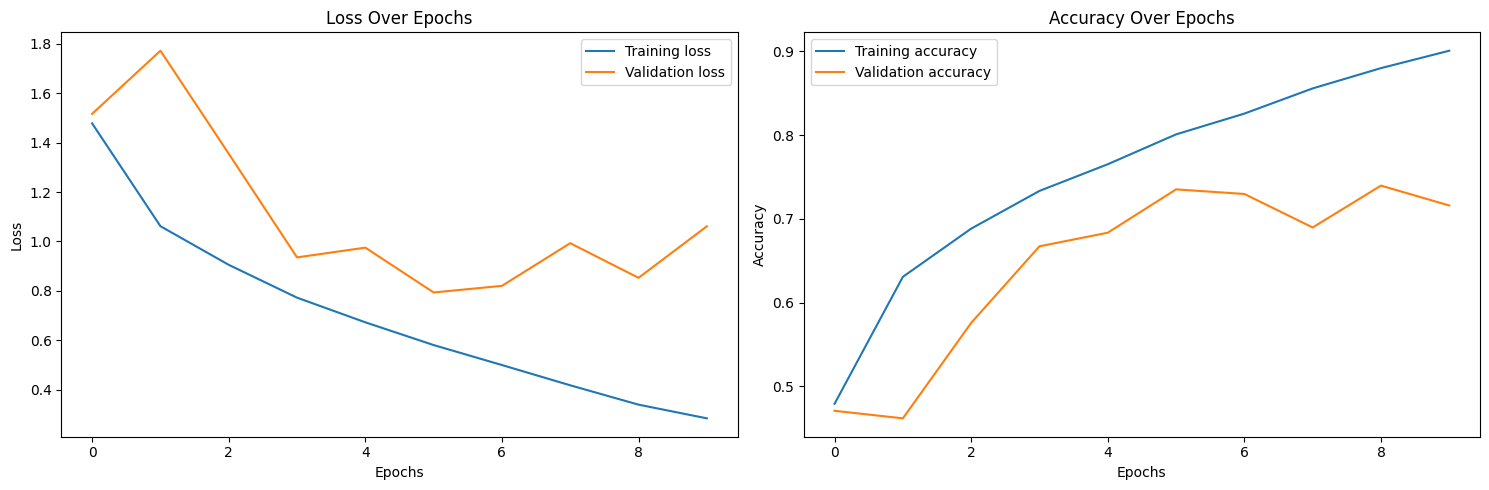

In [35]:
# Find the best learning rate from the DataFrame based on the highest validation accuracy
best_lr = df_learning_rate_results.loc[df_learning_rate_results['Validation Accuracy'].idxmax(), 'Learning Rate']

print(f"\nBest Learning Rate: {best_lr}")

# Plot the loss and accuracy curves for the best learning rate
show_epoch(all_histories[best_lr])

The default learning rate (0.001) gave the best results, which is the same learning rate as the baseline ResNet-18 model.

## 5.2 Optimizer Optimization

In [36]:
# Best learning rate from previous tuning
best_learning_rate = 0.001

# Define the optimizers to test
optimizers = {
    'Adam': tf.keras.optimizers.Adam(learning_rate=best_learning_rate),
    'SGD': tf.keras.optimizers.SGD(learning_rate=best_learning_rate),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=best_learning_rate)
}

# Dictionary to store metrics and history for each optimizer
optimizer_metrics = {}
all_histories = {}

total_epochs = 20

# Iterate over each optimizer
for optimizer_name, optimizer in optimizers.items():
    print(f"\nTraining with optimizer: {optimizer_name}")

    # Create a fresh copy of your best ResNet-18 model
    model = tf.keras.models.clone_model(restnet18)
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    # Train the model with the current optimizer
    history = model.fit(
        train_images, train_labels,
        epochs=total_epochs,
        validation_data=(validation_images, validation_labels),
        batch_size=32,
        callbacks=[early_stopping],
        verbose=2
    )

    # Store the history
    all_histories[optimizer_name] = history

    # Determine if early stopping was triggered
    if len(history.history['val_accuracy']) < total_epochs:
        # Early stopping was triggered, use the second-to-last value
        final_val_accuracy = history.history['val_accuracy'][-2]
        final_val_loss = history.history['val_loss'][-2]
    else:
        # Early stopping was not triggered, use the last value
        final_val_accuracy = history.history['val_accuracy'][-1]
        final_val_loss = history.history['val_loss'][-1]

    # Save the metrics
    optimizer_metrics[optimizer_name] = {
        'Final Validation Accuracy': final_val_accuracy,
        'Final Validation Loss': final_val_loss
    }

# Convert the results into a DataFrame
df_optimizer_results = pd.DataFrame.from_dict(optimizer_metrics, orient='index')
df_optimizer_results.index.name = 'Optimizer'
df_optimizer_results.reset_index(inplace=True)

# Display the DataFrame normally
print("\nOptimizer Tuning Results:")
print(df_optimizer_results)


Training with optimizer: Adam


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_6', however the lay

Epoch 1/20
1563/1563 - 35s - 22ms/step - accuracy: 0.4788 - loss: 1.4724 - val_accuracy: 0.4042 - val_loss: 1.7696
Epoch 2/20
1563/1563 - 10s - 6ms/step - accuracy: 0.6292 - loss: 1.0665 - val_accuracy: 0.6423 - val_loss: 0.9963
Epoch 3/20
1563/1563 - 10s - 6ms/step - accuracy: 0.6945 - loss: 0.8878 - val_accuracy: 0.5957 - val_loss: 1.2480
Epoch 4/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7329 - loss: 0.7743 - val_accuracy: 0.7085 - val_loss: 0.8660
Epoch 5/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7711 - loss: 0.6628 - val_accuracy: 0.5825 - val_loss: 1.4188
Epoch 6/20
1563/1563 - 10s - 6ms/step - accuracy: 0.8001 - loss: 0.5775 - val_accuracy: 0.7433 - val_loss: 0.7925
Epoch 7/20
1563/1563 - 10s - 6ms/step - accuracy: 0.8273 - loss: 0.5018 - val_accuracy: 0.7182 - val_loss: 0.8924
Epoch 8/20
1563/1563 - 10s - 6ms/step - accuracy: 0.8616 - loss: 0.4000 - val_accuracy: 0.7072 - val_loss: 0.9845
Epoch 9/20
1563/1563 - 10s - 6ms/step - accuracy: 0.8837 - loss: 0.3384 - val_accuracy:


Best Optimizer: Adam


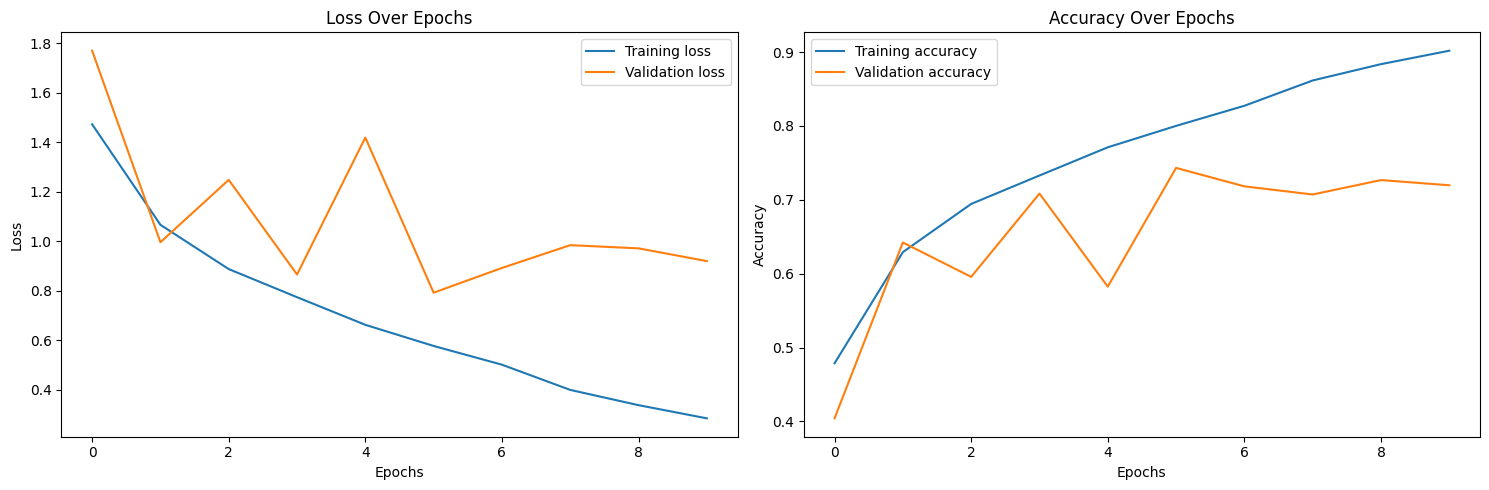

In [37]:
# Find the optimizer with the best validation accuracy
best_optimizer_name = df_optimizer_results.loc[df_optimizer_results['Final Validation Accuracy'].idxmax(), 'Optimizer']
print(f"\nBest Optimizer: {best_optimizer_name}")

# Plot the loss and accuracy curves for the best optimizer using `show_epoch`
show_epoch(all_histories[best_optimizer_name])

The baseline ResNet-18 model using the Adam optimizer gave the best result, outperforming the other optimizers tested.

## 5.3 Regularization Optimization

In [48]:
# Dictionary to store metrics for each regularization method
regularization_metrics = {}

# List of regularization methods to test
regularization_methods = ['L2 Regularization', 'Dropout']

total_epochs = 20
all_histories = {}

# Iterate over each regularization method
for method in regularization_methods:
    print(f"\nTraining with regularization method: {method}")

    # Create a fresh copy of your best ResNet-18 model
    model = tf.keras.models.clone_model(restnet18)

    # Apply the chosen regularization method
    if method == 'L2 Regularization':
        # Apply L2 regularization to all Conv2D layers
        for layer in model.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                layer.kernel_regularizer = tf.keras.regularizers.l2(0.01)

    elif method == 'Dropout':
        # Build the model with Dropout layers
        inputs = tf.keras.Input(shape=(32, 32, 3))
        x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

        x = ResNetBlock(64)(x)
        x = ResNetBlock(64)(x)
        x = layers.Dropout(0.3)(x)  # 30% Dropout

        x = ResNetBlock(128, downsample=True)(x)
        x = ResNetBlock(128)(x)
        x = layers.Dropout(0.3)(x)

        x = ResNetBlock(256, downsample=True)(x)
        x = ResNetBlock(256)(x)
        x = layers.Dropout(0.3)(x)

        x = ResNetBlock(512, downsample=True)(x)
        x = ResNetBlock(512)(x)

        x = layers.GlobalAveragePooling2D()(x)
        outputs = layers.Dense(10)(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    # Train the model with the current regularization method
    history = model.fit(
        train_images, train_labels,
        epochs=total_epochs,
        validation_data=(validation_images, validation_labels),
        batch_size=32,
        callbacks=[early_stopping],
        verbose=2
    )

    # Store the history
    all_histories[method] = history

    # Determine if early stopping was triggered
    if len(history.history['val_accuracy']) < total_epochs:
        # Early stopping was triggered, use the second-to-last value
        final_val_accuracy = history.history['val_accuracy'][-2]
        final_val_loss = history.history['val_loss'][-2]
    else:
        # Early stopping was not triggered, use the last value
        final_val_accuracy = history.history['val_accuracy'][-1]
        final_val_loss = history.history['val_loss'][-1]

    # Save the metrics
    regularization_metrics[method] = {
        'Final Validation Accuracy': final_val_accuracy,
        'Final Validation Loss': final_val_loss
    }

# Convert the results into a DataFrame
df_regularization_results = pd.DataFrame.from_dict(regularization_metrics, orient='index')
df_regularization_results.index.name = 'Regularization Method'
df_regularization_results.reset_index(inplace=True)

# Display the DataFrame normally
print("\nRegularization Tuning Results:")
print(df_regularization_results)


Training with regularization method: L2 Regularization


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_6', however the lay

Epoch 1/20
1563/1563 - 34s - 22ms/step - accuracy: 0.4697 - loss: 1.4893 - val_accuracy: 0.5010 - val_loss: 1.3908
Epoch 2/20
1563/1563 - 10s - 6ms/step - accuracy: 0.6227 - loss: 1.0785 - val_accuracy: 0.6047 - val_loss: 1.1061
Epoch 3/20
1563/1563 - 10s - 6ms/step - accuracy: 0.6879 - loss: 0.8953 - val_accuracy: 0.5677 - val_loss: 1.6099
Epoch 4/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7292 - loss: 0.7867 - val_accuracy: 0.6168 - val_loss: 1.1049
Epoch 5/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7606 - loss: 0.6932 - val_accuracy: 0.6550 - val_loss: 1.0093
Epoch 6/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7993 - loss: 0.5845 - val_accuracy: 0.6693 - val_loss: 0.9700
Epoch 7/20
1563/1563 - 10s - 6ms/step - accuracy: 0.8275 - loss: 0.4992 - val_accuracy: 0.6367 - val_loss: 1.1901
Epoch 8/20
1563/1563 - 10s - 6ms/step - accuracy: 0.8568 - loss: 0.4165 - val_accuracy: 0.7245 - val_loss: 0.8713
Epoch 9/20
1563/1563 - 10s - 6ms/step - accuracy: 0.8781 - loss: 0.3511 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_26', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_28', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_30', however the 

Epoch 1/20
1563/1563 - 41s - 26ms/step - accuracy: 0.4053 - loss: 1.6733 - val_accuracy: 0.4050 - val_loss: 1.7261
Epoch 2/20
1563/1563 - 10s - 6ms/step - accuracy: 0.5624 - loss: 1.2469 - val_accuracy: 0.4863 - val_loss: 1.5062
Epoch 3/20
1563/1563 - 10s - 6ms/step - accuracy: 0.6348 - loss: 1.0609 - val_accuracy: 0.4942 - val_loss: 1.7493
Epoch 4/20
1563/1563 - 10s - 6ms/step - accuracy: 0.6768 - loss: 0.9435 - val_accuracy: 0.6220 - val_loss: 1.1676
Epoch 5/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7093 - loss: 0.8534 - val_accuracy: 0.7088 - val_loss: 0.8567
Epoch 6/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7367 - loss: 0.7696 - val_accuracy: 0.6618 - val_loss: 1.0321
Epoch 7/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7567 - loss: 0.7146 - val_accuracy: 0.5580 - val_loss: 1.3435
Epoch 8/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7763 - loss: 0.6531 - val_accuracy: 0.6162 - val_loss: 1.1619
Epoch 9/20
1563/1563 - 10s - 6ms/step - accuracy: 0.7804 - loss: 0.6441 - val_accuracy:


Best Regularization Method: L2 Regularization


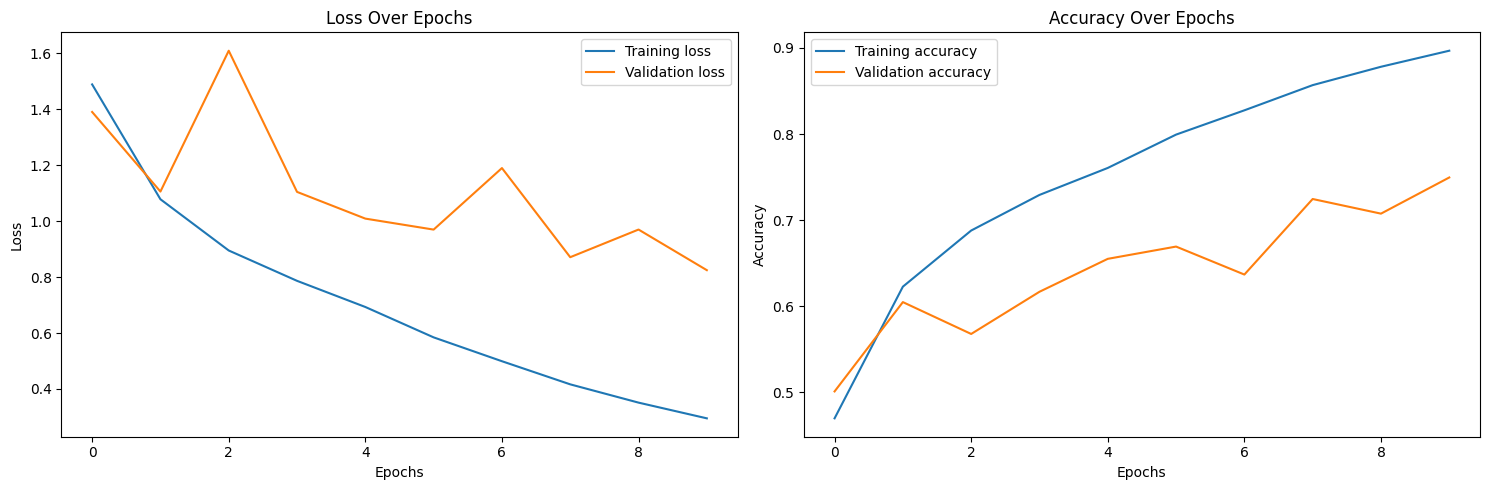

In [49]:
# Find the best regularization method based on validation accuracy
best_regularization_method = df_regularization_results.loc[
    df_regularization_results['Final Validation Accuracy'].idxmax(), 'Regularization Method'
]

print(f"\nBest Regularization Method: {best_regularization_method}")

# Plot the loss and accuracy curves for the best regularization method
show_epoch(all_histories[best_regularization_method])

We tried two regularization techniques, L2 Regularization and Dropout, but neither exceeded the performance of the baseline ResNet-18 model. Therefore, we decided not to include regularization in our final model.

## 5.4 Residual Link Optimization

In [44]:
residual_link_metrics = {}
all_histories = {}

total_epochs = 20

# Create the ResNet-18 model without residual links
print("\nTraining Model Without Residual Links")

inputs = tf.keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Replacing ResNet Blocks with simple Conv2D layers (no residual connections)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(128, (3, 3), padding='same', strides=(2, 2), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(256, (3, 3), padding='same', strides=(2, 2), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(512, (3, 3), padding='same', strides=(2, 2), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10)(x)

# Create the model
model_without_residuals = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model_without_residuals.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model without residual links
history = model_without_residuals.fit(
    train_images, train_labels,
    epochs=total_epochs,
    validation_data=(validation_images, validation_labels),
    batch_size=32,
    callbacks=[early_stopping],
    verbose=2
)

# Store the history
all_histories["Without Residual Links"] = history

# Determine if early stopping was triggered
if len(history.history['val_accuracy']) < total_epochs:
    # Early stopping was triggered, use the second-to-last value
    final_val_accuracy = history.history['val_accuracy'][-2]
    final_val_loss = history.history['val_loss'][-2]
else:
    # Early stopping was not triggered, use the last value
    final_val_accuracy = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

# Save the metrics
residual_link_metrics["Without Residual Links"] = {
    'Final Validation Accuracy': final_val_accuracy,
    'Final Validation Loss': final_val_loss
}

# Convert the results into a DataFrame
df_residual_link_results = pd.DataFrame.from_dict(residual_link_metrics, orient='index')
df_residual_link_results.index.name = 'Configuration'
df_residual_link_results.reset_index(inplace=True)

# Display the DataFrame normally
print("\nResidual Link Tuning Results:")
print(df_residual_link_results)


Training Model Without Residual Links
Epoch 1/20
1563/1563 - 18s - 12ms/step - accuracy: 0.4578 - loss: 1.5333 - val_accuracy: 0.5125 - val_loss: 1.3955
Epoch 2/20
1563/1563 - 6s - 4ms/step - accuracy: 0.6031 - loss: 1.1383 - val_accuracy: 0.5077 - val_loss: 1.7037
Epoch 3/20
1563/1563 - 5s - 4ms/step - accuracy: 0.6732 - loss: 0.9544 - val_accuracy: 0.6423 - val_loss: 1.0094
Epoch 4/20
1563/1563 - 6s - 4ms/step - accuracy: 0.7164 - loss: 0.8255 - val_accuracy: 0.6455 - val_loss: 1.0213
Epoch 5/20
1563/1563 - 6s - 4ms/step - accuracy: 0.7537 - loss: 0.7221 - val_accuracy: 0.6938 - val_loss: 0.9236
Epoch 6/20
1563/1563 - 6s - 4ms/step - accuracy: 0.7886 - loss: 0.6149 - val_accuracy: 0.7078 - val_loss: 0.8775
Epoch 7/20
1563/1563 - 6s - 4ms/step - accuracy: 0.8206 - loss: 0.5256 - val_accuracy: 0.7215 - val_loss: 0.8405
Epoch 8/20
1563/1563 - 6s - 4ms/step - accuracy: 0.8491 - loss: 0.4398 - val_accuracy: 0.7225 - val_loss: 0.8659
Epoch 9/20
1563/1563 - 5s - 4ms/step - accuracy: 0.8753

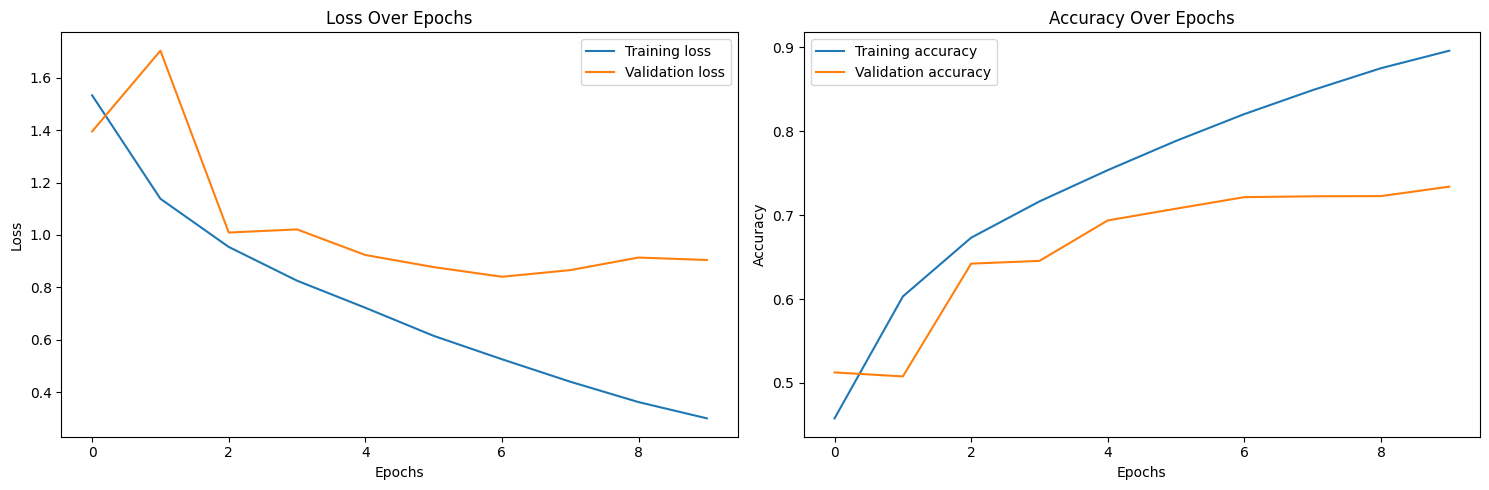

In [45]:
# Plot the loss and accuracy curves for the model without residual links
show_epoch(all_histories["Without Residual Links"])

Tried the model without residual links and observed that, although it performed closely, it did not surpass the performance of the baseline ResNet-18 model with residual links.

## 5.5 Data Augmentation

In [50]:
# Dictionary to store metrics
data_augmentation_metrics = {}
all_histories = {}

total_epochs = 20

# Define Data Augmentation using tf.keras.Sequential
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2)
])

# Create a new ResNet-18 model with Data Augmentation
print("\nTraining Model with Data Augmentation")

# Build the model with data augmentation
inputs = tf.keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)  # Apply data augmentation
x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = ResNetBlock(64)(x)
x = ResNetBlock(64)(x)
x = ResNetBlock(128, downsample=True)(x)
x = ResNetBlock(128)(x)
x = ResNetBlock(256, downsample=True)(x)
x = ResNetBlock(256)(x)
x = ResNetBlock(512, downsample=True)(x)
x = ResNetBlock(512)(x)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10)(x)

# Create the model
model_with_augmentation = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model_with_augmentation.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model with data augmentation
history = model_with_augmentation.fit(
    train_images, train_labels,
    epochs=total_epochs,
    validation_data=(validation_images, validation_labels),
    batch_size=32,
    callbacks=[early_stopping],
    verbose=2
)

# Store the history
all_histories["Data Augmentation"] = history

# Determine if early stopping was triggered
if len(history.history['val_accuracy']) < total_epochs:
    # Early stopping was triggered, use the second-to-last value
    final_val_accuracy = history.history['val_accuracy'][-2]
    final_val_loss = history.history['val_loss'][-2]
else:
    # Early stopping was not triggered, use the last value
    final_val_accuracy = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

# Save the metrics
data_augmentation_metrics["Data Augmentation"] = {
    'Final Validation Accuracy': final_val_accuracy,
    'Final Validation Loss': final_val_loss
}

# Convert the results into a DataFrame
df_data_augmentation_results = pd.DataFrame.from_dict(data_augmentation_metrics, orient='index')
df_data_augmentation_results.index.name = 'Configuration'
df_data_augmentation_results.reset_index(inplace=True)

# Display the DataFrame normally
print("\nData Augmentation Tuning Results:")
print(df_data_augmentation_results)


Training Model with Data Augmentation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_34', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_36', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_38', however the 

Epoch 1/20
1563/1563 - 53s - 34ms/step - accuracy: 0.3832 - loss: 1.7502 - val_accuracy: 0.4548 - val_loss: 1.5166
Epoch 2/20
1563/1563 - 40s - 26ms/step - accuracy: 0.4753 - loss: 1.4978 - val_accuracy: 0.5178 - val_loss: 1.3655
Epoch 3/20
1563/1563 - 40s - 26ms/step - accuracy: 0.5285 - loss: 1.3480 - val_accuracy: 0.3027 - val_loss: 4.2262
Epoch 4/20
1563/1563 - 40s - 25ms/step - accuracy: 0.5606 - loss: 1.2662 - val_accuracy: 0.4270 - val_loss: 1.7383
Epoch 5/20
1563/1563 - 40s - 25ms/step - accuracy: 0.5888 - loss: 1.1865 - val_accuracy: 0.6037 - val_loss: 1.1233
Epoch 6/20
1563/1563 - 40s - 25ms/step - accuracy: 0.6109 - loss: 1.1237 - val_accuracy: 0.6230 - val_loss: 1.1171
Epoch 7/20
1563/1563 - 40s - 26ms/step - accuracy: 0.6303 - loss: 1.0628 - val_accuracy: 0.6313 - val_loss: 1.0691
Epoch 8/20
1563/1563 - 39s - 25ms/step - accuracy: 0.6485 - loss: 1.0151 - val_accuracy: 0.6595 - val_loss: 1.0002
Epoch 9/20
1563/1563 - 40s - 25ms/step - accuracy: 0.6630 - loss: 0.9771 - val_a

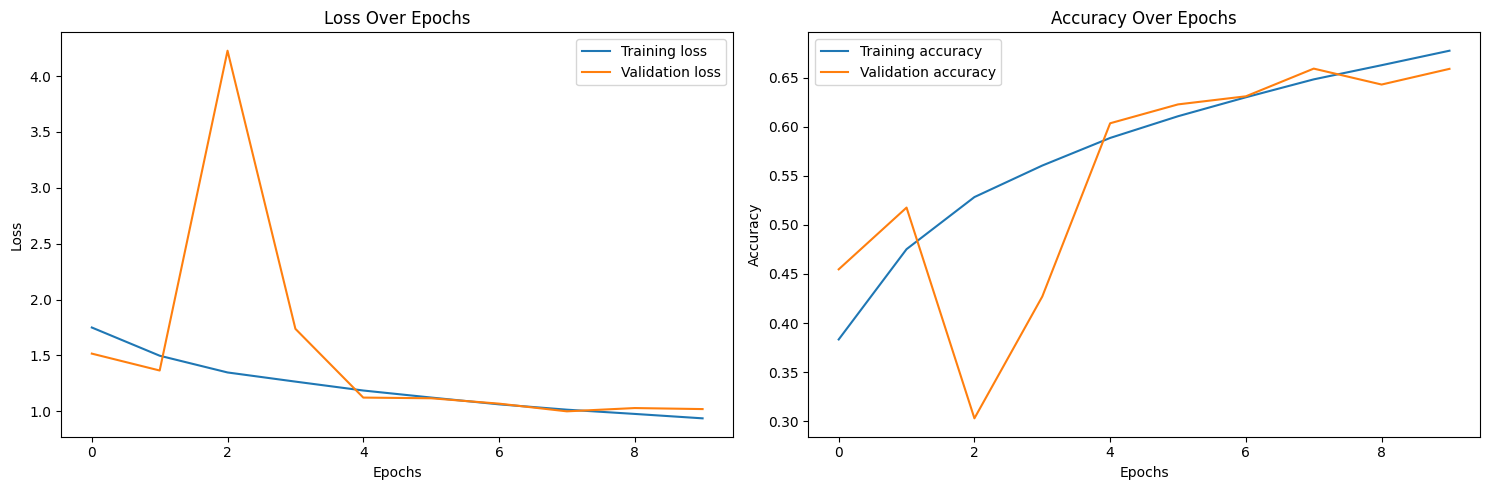

In [51]:
# Plot the loss and accuracy curves for the model with data augmentation
show_epoch(all_histories["Data Augmentation"])

Data augmentation was applied to improve model generalization, but it did not yield better results compared to the baseline ResNet-18 model.

# 6. Best Model

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


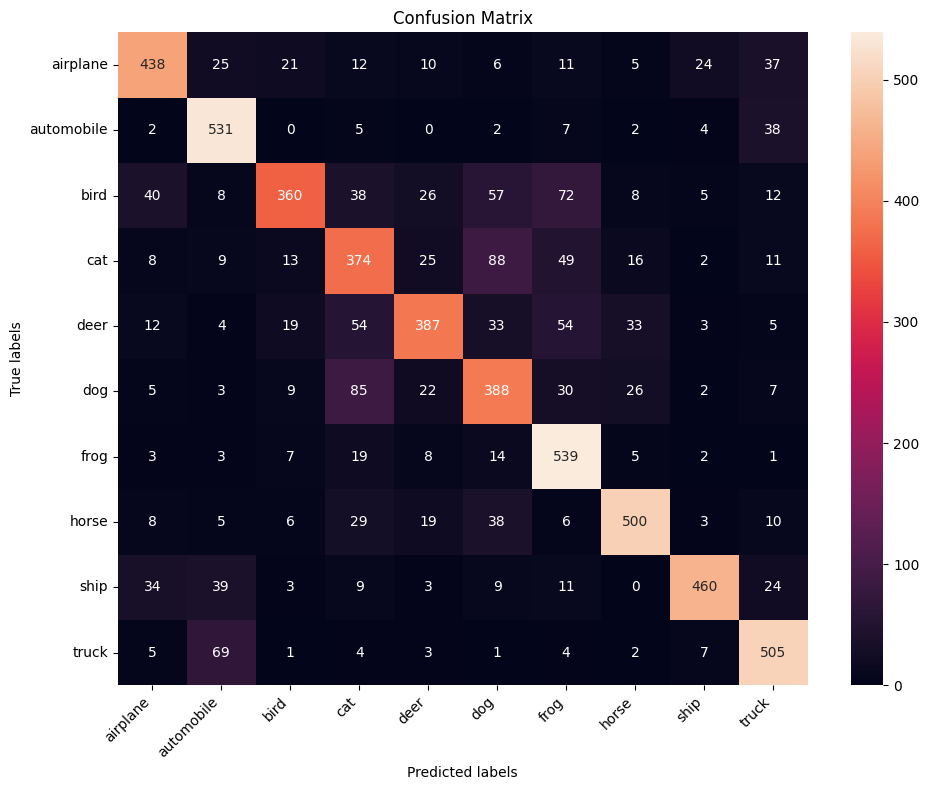

{'Model': 'Best Model', 'Accuracy': 0.747, 'F1 score': 0.745780753181139, 'Precision': 0.755784175376499, 'Recall': 0.747}


In [ ]:
best_model = restnet18  # Basline RestNet-18 model

# Evaluate the best model on the test data
y_pred_best_model = best_model.predict(test_images)
y_pred_classes_best_model = np.argmax(y_pred_best_model, axis=1)
y_true_classes_best_model = test_labels.flatten()

best_model_cm = display_confusion_matrix(y_true_classes_best_model, y_pred_classes_best_model)

best_model_metrics = display_metrics(y_true_classes_best_model, y_pred_classes_best_model, "Best Model")
print(best_model_metrics)